In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_aprobaciones = pd.read_csv('../aprobaciones_limpias.csv')
df_desembolsos = pd.read_csv('../desembolsos_limpios.csv')

In [13]:
df_aprobaciones.head()

,PAIS,ANIO_APROBACION,SECTOR_INSTITUCIONAL,MONTO_BRUTO_USD,CANTIDAD_APROBACIONES,DECADA,TIPO
0,Costa Rica,2012,Sector Privado,3000000.0,1,2010,Aprobacion
1,Argentina,2022,Sector Público,115000000.0,4,2020,Aprobacion
2,Argentina,2015,Sector Público,50000000.0,1,2010,Aprobacion
3,Argentina,2017,Sector Público,30000000.0,1,2010,Aprobacion
4,Costa Rica,2003,Sector Privado,54336000.0,12,2000,Aprobacion


In [5]:
df_desembolsos.head()

,PAIS,ANIO_DESEMBOLSO,SECTOR_INSTITUCIONAL,MONTO_BRUTO_USD,DECADA,TIPO
0,Costa Rica,1965,Sector Público,1994591.79,1960,Desembolso
1,El Salvador,1967,Sector Público,4695698.73,1960,Desembolso
2,Honduras,1964,Sector Público,1262295.16,1960,Desembolso
3,Guatemala,1964,Sector Público,2250000.00,1960,Desembolso
4,Cuba,2024,Sector Público,28794236.23,2020,Desembolso


In [18]:
df_aprob_sector_decada = pd.DataFrame(df_aprobaciones.groupby(['DECADA','SECTOR_INSTITUCIONAL']).sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [20]:
df_aprob_sector_decada = df_aprob_sector_decada.reset_index()

In [23]:
df_aprob_sector_decada

,DECADA,SECTOR_INSTITUCIONAL,MONTO_BRUTO_USD
0,1960,Sector Privado,7.224932e+07
1,1960,Sector Público,1.425626e+08
2,1970,Sector Privado,2.804145e+08
3,1970,Sector Público,8.616409e+08
4,1980,Sector Privado,6.298709e+07
5,1980,Sector Público,8.948198e+08
6,1990,Sector Privado,1.583756e+09
7,1990,Sector Público,2.839722e+09
8,2000,Sector Privado,4.458697e+09
9,2000,Sector Público,7.717930e+09


In [21]:
df_aprob_sector_pivot = df_aprob_sector_decada.pivot(
    index='DECADA',
    columns='SECTOR_INSTITUCIONAL',
    values='MONTO_BRUTO_USD'
)

In [22]:
df_aprob_sector_pivot

SECTOR_INSTITUCIONAL,Sector Privado,Sector Público
DECADA,,
1960,7.224932e+07,1.425626e+08
1970,2.804145e+08,8.616409e+08
1980,6.298709e+07,8.948198e+08
1990,1.583756e+09,2.839722e+09
2000,4.458697e+09,7.717930e+09
2010,2.295297e+09,1.637203e+10
2020,6.307184e+08,1.895321e+10


In [24]:
df_aprob_sector_pivot = df_aprob_sector_pivot / 1e9

In [26]:
df_aprob_sector_pivot = df_aprob_sector_pivot.round(2)

In [27]:
df_aprob_sector_pivot

SECTOR_INSTITUCIONAL,Sector Privado,Sector Público
DECADA,,
1960,0.07,0.14
1970,0.28,0.86
1980,0.06,0.89
1990,1.58,2.84
2000,4.46,7.72
2010,2.30,16.37
2020,0.63,18.95


<Figure size 1000x600 with 0 Axes>

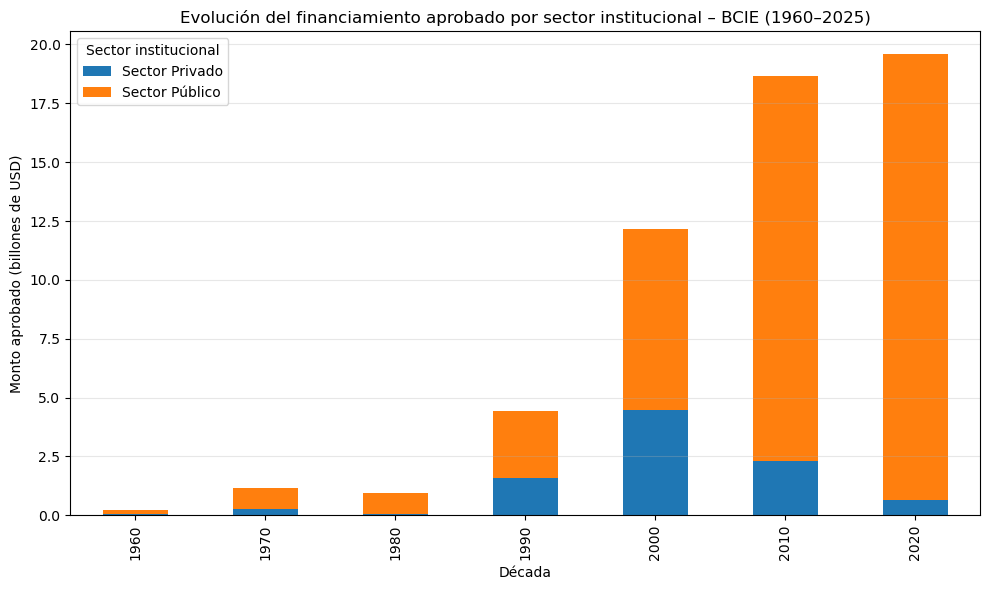

In [29]:
plt.figure(figsize=(10,6))

df_aprob_sector_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Evolución del financiamiento aprobado por sector institucional – BCIE (1960–2025)')
plt.xlabel('Década')
plt.ylabel('Monto aprobado (billones de USD)')

plt.legend(title='Sector institucional')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(
    'Graficos/08_evolucion_sectorial_aprobaciones.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [54]:
df_desem_sector_decada = pd.DataFrame(df_desembolsos.groupby(['DECADA','SECTOR_INSTITUCIONAL']).sum('MONTO_BRUTO_USD')['MONTO_BRUTO_USD'])

In [55]:
df_desem_sector_decada = df_desem_sector_decada.reset_index()

In [56]:
df_desem_sector_pivot = df_desem_sector_decada.pivot(
    index='DECADA',
    columns='SECTOR_INSTITUCIONAL',
    values='MONTO_BRUTO_USD'
)

In [57]:
df_desem_sector_pivot = df_desem_sector_pivot / 1e9

In [58]:
df_desem_sector_pivot = df_desem_sector_pivot.round(2)

In [69]:
df_desem_sector_pivot

SECTOR_INSTITUCIONAL,Sector Privado,Sector Público
DECADA,,
1960,NaN,0.02
1970,0.01,0.03
1980,0.01,0.13
1990,1.05,2.08
2000,6.78,4.99
2010,4.76,10.49
2020,1.47,11.38


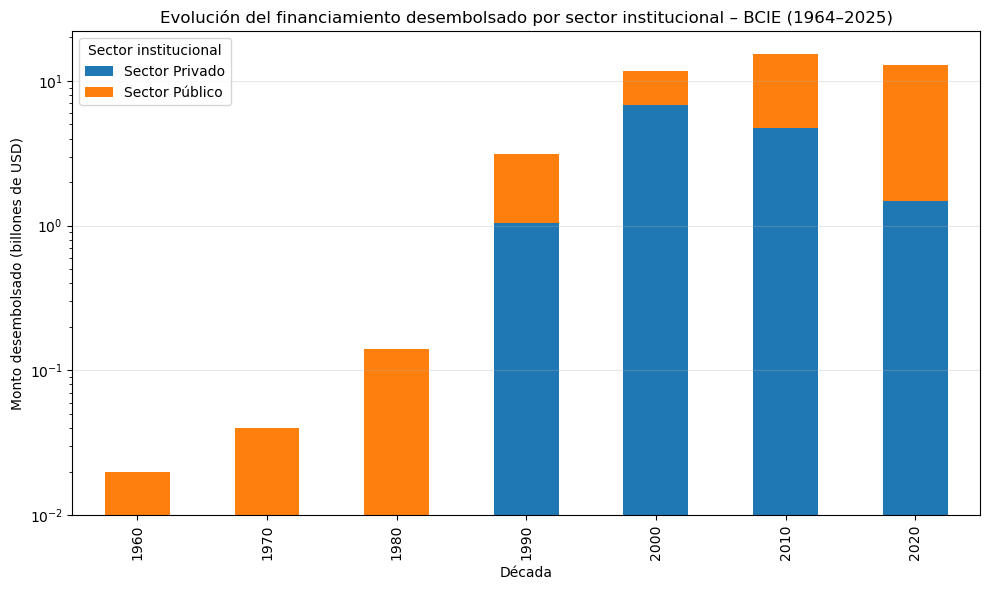

In [76]:
df_desem_sector_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.yscale('log')

plt.title('Evolución del financiamiento desembolsado por sector institucional – BCIE (1964–2025)')
plt.xlabel('Década')
plt.ylabel('Monto desembolsado (billones de USD)')

plt.legend(title='Sector institucional')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()

plt.savefig(
    'Graficos/09_evolucion_sectorial_desembolsos.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()